In [143]:
print("      ")

<b> Student Performance Indicator </b>


Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model

1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

<b> 2.1 Import Data and Required Packages </b>

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
#Data handling packages
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

#Misc
import os
import warnings
warnings.filterwarnings('ignore')
sns.set()
sns.set_style("whitegrid")
sns.set_palette("pastel")



<b> Dataset information </b>

gender : sex of students -> (Male/female) <br>
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E) <br>
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school) <br>
lunch : having lunch before test (standard or free/reduced) <br>
test preparation course : complete or not complete before test <br>
math score <br>
reading score <br>
writing score

<b> Read the data </b>

In [3]:
data = pd.read_csv("StudentsPerformance.csv")

print("Number of observations is {}".format(data.shape[0]))
print("Number of features is {}".format(data.shape[1]))
print('\n')
data.head()

Number of observations is 1000
Number of features is 8




,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

* Math, Reading & Writing scores are numeric in nature
* Gender, Race/ethinicity/parental level/lunch/test prep course are object types

In [6]:
data.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [7]:
data.describe(include='int64')

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

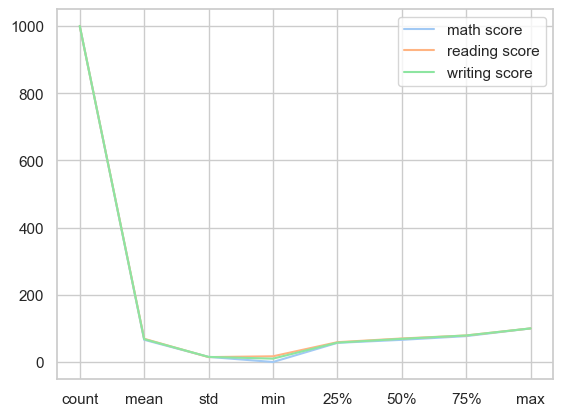

In [8]:
data.describe(include='int64').plot()

* Distribution of all three scores looks similar
* Mean,, std of the scores seams to be closer
* Math score is zero in minimum bound but whereas reading & writing score is 17 & 10 respectively

<b> check for null </b>

In [9]:
data.isnull().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

* No obsevrations will null found

<b>Duplicate check</b>

In [10]:
data[data.duplicated()]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


* No duplicate observations are found

In [11]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<b> Feature Engineering </b>

* Derive a new feature called avergae marks ==> (Math + reading + writing)/3

In [38]:
data['average score'] = round((data['math score'] + data['writing score'] + data['reading score'])/3,0)

<b> Exploratory data anlysis <b>

In [39]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0


In [44]:
num_cols  = data.select_dtypes(include=['int64', 'float64']).columns
char_cols = data.select_dtypes(include='O').columns

print("Numeric columns {}".format(num_cols)); print('\n');
print("Char    columns {}".format(char_cols))

Numeric columns Index(['math score', 'reading score', 'writing score', 'average score'], dtype='object')


Char    columns Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [45]:
for char_col in char_cols:
    print(char_col)
    print("Feature {} has {} unique values -- {}".format(char_col, data[char_col].nunique(), data[char_col].unique()))
    print('\n')

gender
Feature gender has 2 unique values -- ['female' 'male']


race/ethnicity
Feature race/ethnicity has 5 unique values -- ['group B' 'group C' 'group A' 'group D' 'group E']


parental level of education
Feature parental level of education has 6 unique values -- ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


lunch
Feature lunch has 2 unique values -- ['standard' 'free/reduced']


test preparation course
Feature test preparation course has 2 unique values -- ['none' 'completed']




<b> Distribution plot </b>

Text(0.5, 1.0, 'average score')

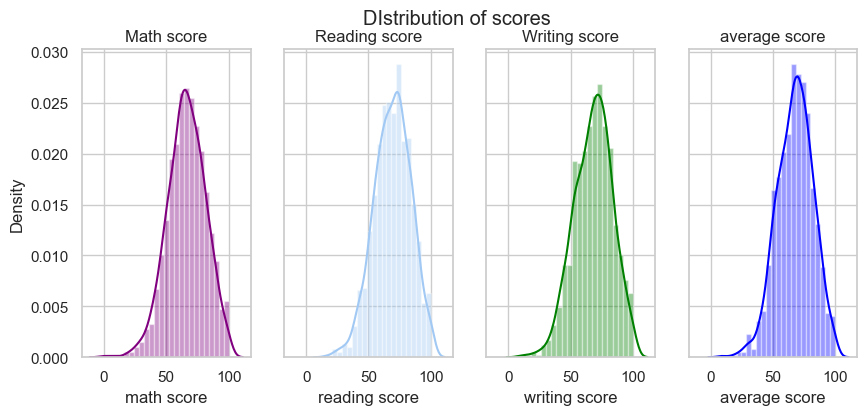

In [48]:
fig, axes =plt.subplots(1,4, sharex=True, figsize=(10,4), sharey=True)
fig.suptitle("DIstribution of scores")

sns.distplot(data['math score'], ax=axes[0], color='purple')
axes[0].set_title('Math score')

sns.distplot(data['reading score'], ax=axes[1])
axes[1].set_title('Reading score')

sns.distplot(data['writing score'], ax=axes[2], color='green')
axes[2].set_title('Writing score')

sns.distplot(data['average score'], ax=axes[3], color='blue')
axes[3].set_title('average score')



<b> gender </b>

<Figure size 300x300 with 0 Axes>

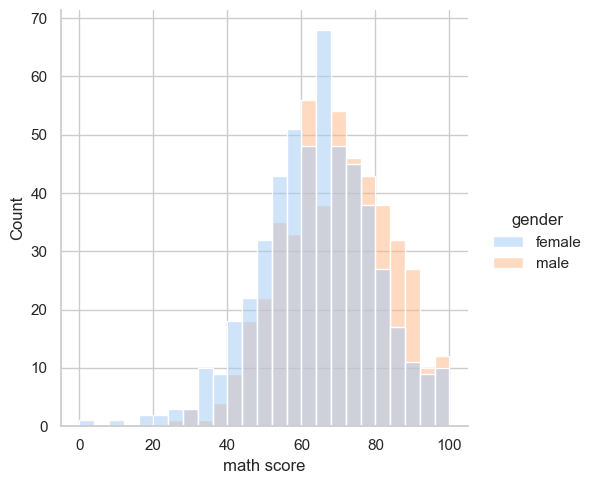

<Figure size 300x300 with 0 Axes>

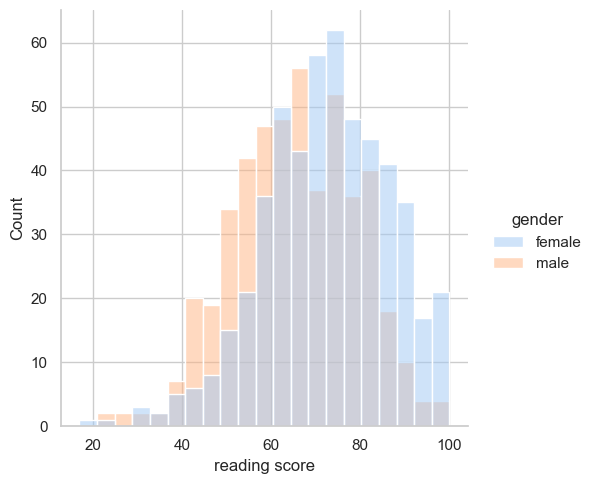

<Figure size 300x300 with 0 Axes>

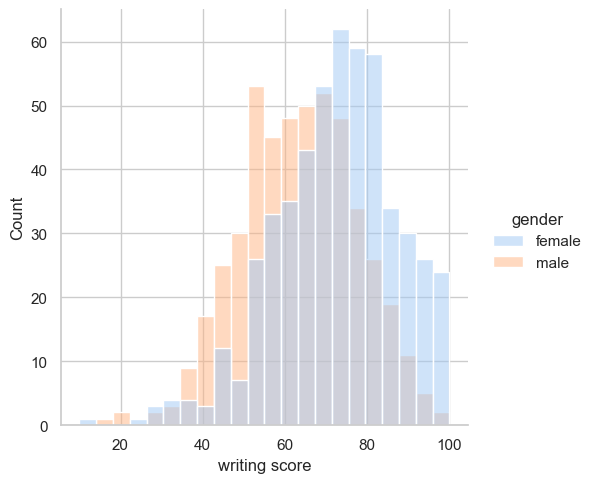

<Figure size 300x300 with 0 Axes>

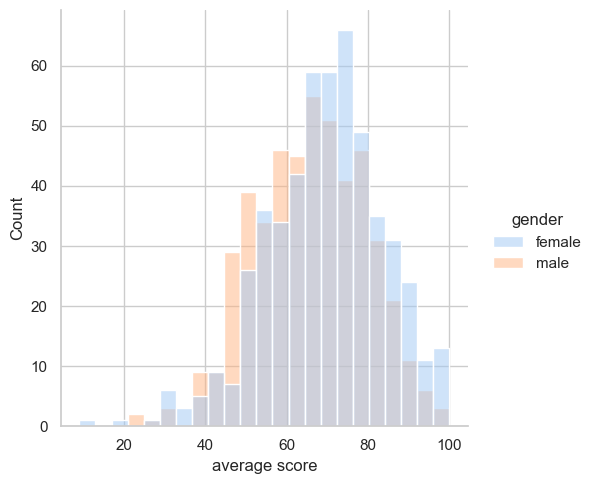

In [49]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    plt.figure(figsize=(3,3))
    sns.displot(data, x=col, hue='gender')
    plt.show()

* Writing score: More girl students have scored more marks especially for marks > 70
* Reading score: More girl students have scored more marks especially for marks > 65
* average score: More girl students have scored more marks especially for marks > 65
* Math score: Trend is reverse here. Boy students have scored more marks especially considering the marks > 70

In [50]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'average score'],
      dtype='object')

<b> Race/ethinicity </b>

In [53]:
data['race/ethnicity'].value_counts(normalize=True)

group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64

<Axes: xlabel='race/ethnicity'>

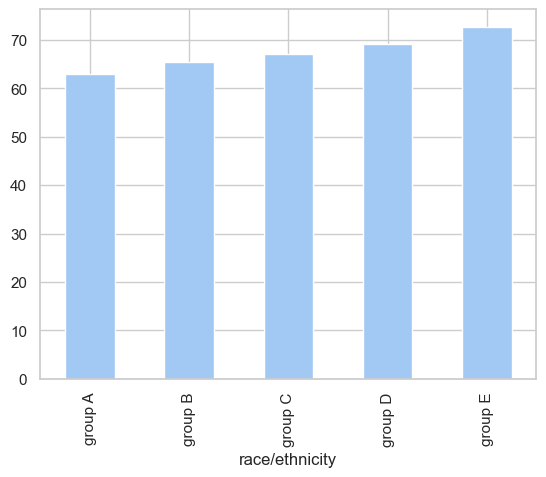

In [72]:
data.groupby(by='race/ethnicity')['average score'].mean().plot(kind='bar')

From the above plot, Group-E tends to have more average of average_score compared to groupA

<Figure size 300x300 with 0 Axes>

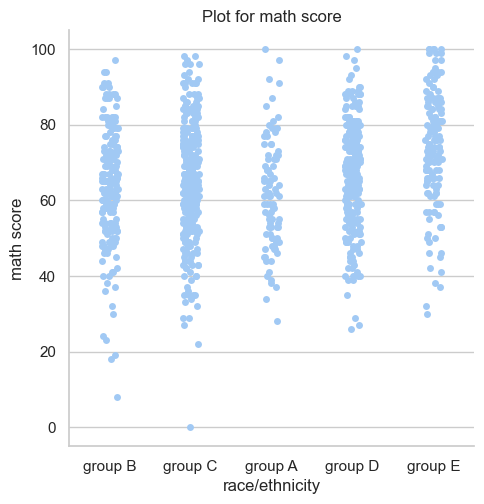

<Figure size 300x300 with 0 Axes>

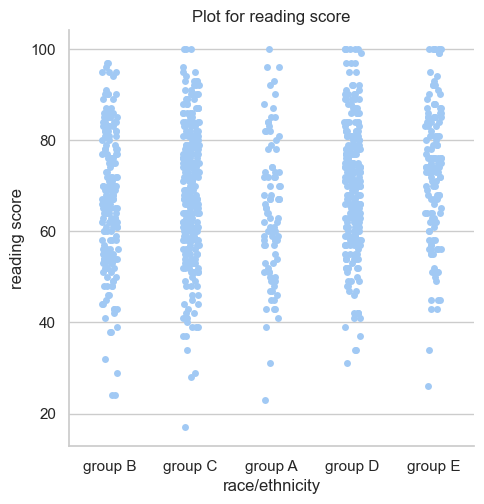

<Figure size 300x300 with 0 Axes>

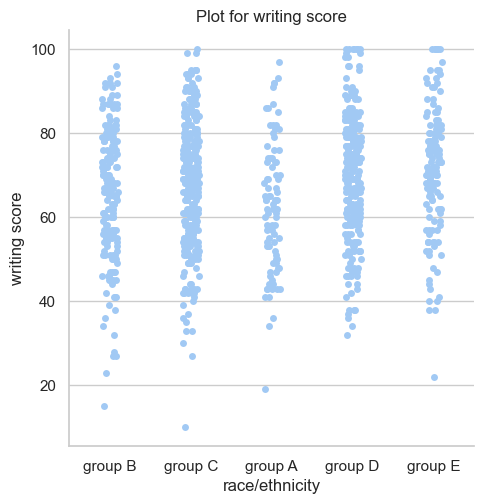

<Figure size 300x300 with 0 Axes>

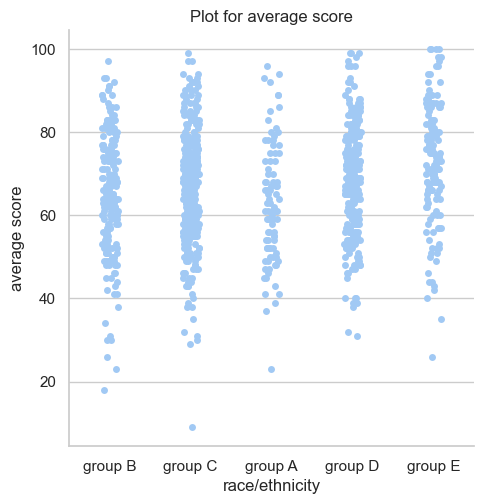

In [61]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    plt.figure(figsize=(3,3))
    sns.catplot(data=data, x="race/ethnicity", y=col)
    plt.title("Plot for {}".format(col))
    plt.show()




* No strong signal based on race/ethinicity
* GroupA has less observations - so we cannot lean on sprase distribution in above plot
* GroupE has sparse data points between the score 40 and 60

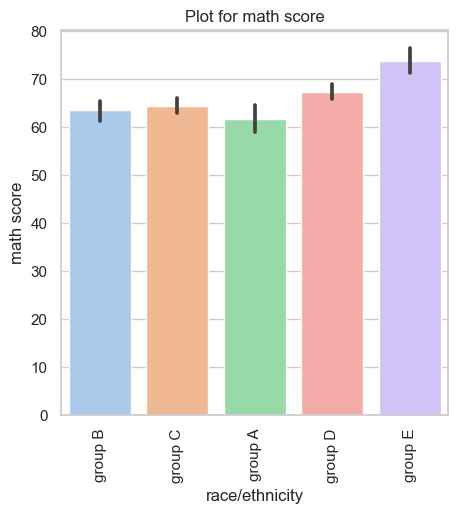

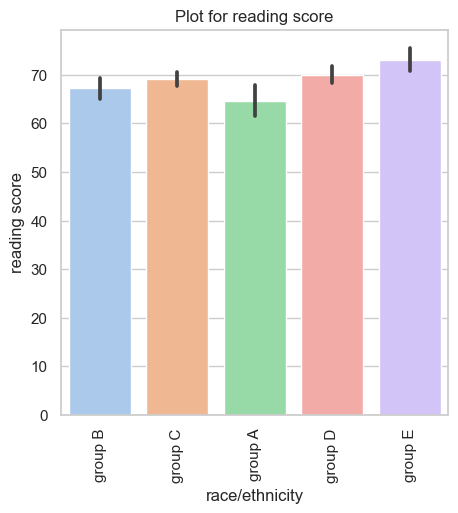

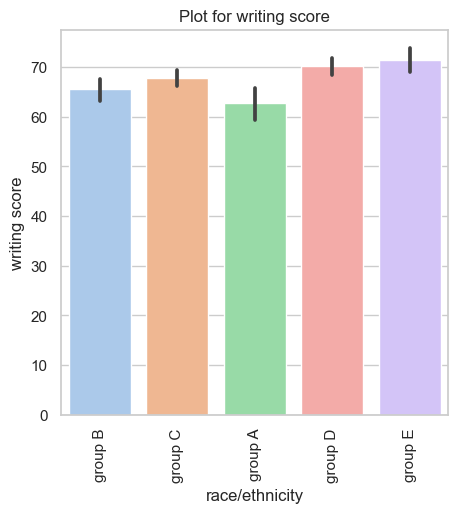

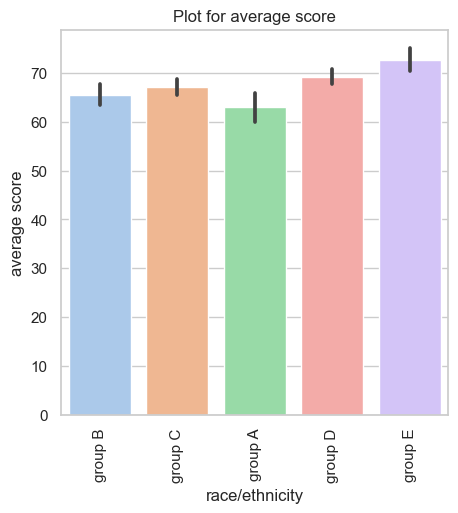

In [148]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    plt.figure(figsize=(5,5))
    sns.barplot(data=data, x="race/ethnicity", y=col)
    plt.xticks(rotation=90)
    plt.title("Plot for {}".format(col))
    plt.show()

<b> parental level of education </b>

In [64]:
print(data['parental level of education'].unique())

data['parental level of education'].value_counts()

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

<Axes: xlabel='parental level of education'>

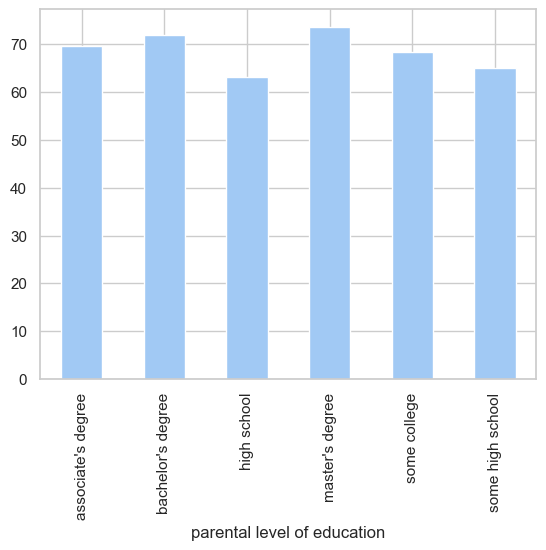

In [70]:
data.groupby(by='parental level of education')['average score'].mean().plot(kind='bar')

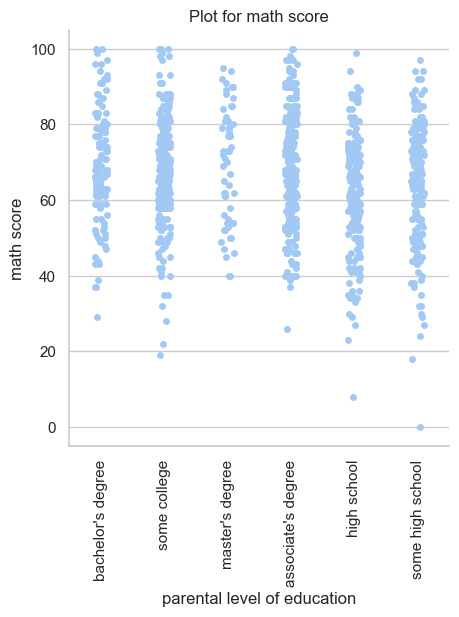

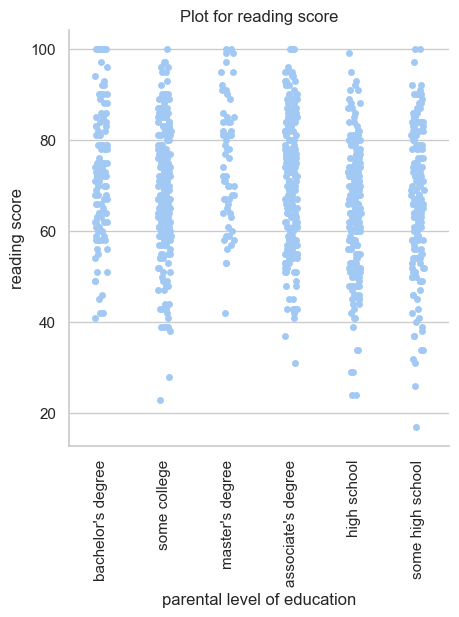

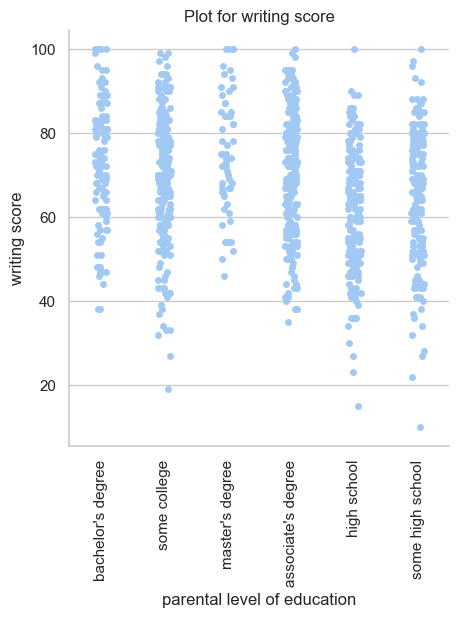

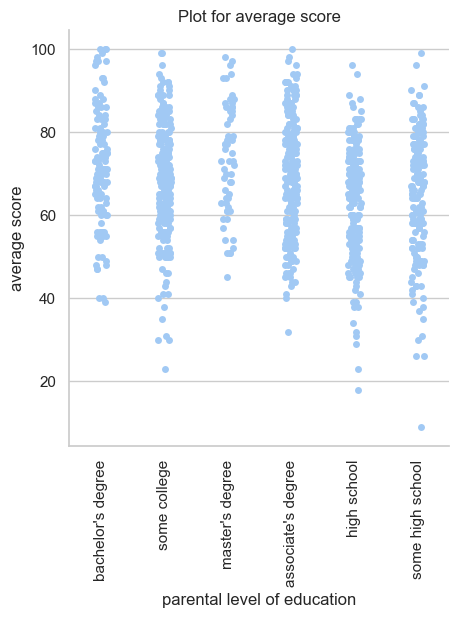

In [76]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    sns.catplot(data=data, x="parental level of education", y=col)
    plt.title("Plot for {}".format(col))
    plt.xticks(rotation=90)
    plt.show()

<b> lunch </b>

In [82]:
data['lunch'].nunique(), data['lunch'].unique()

(2, array(['standard', 'free/reduced'], dtype=object))

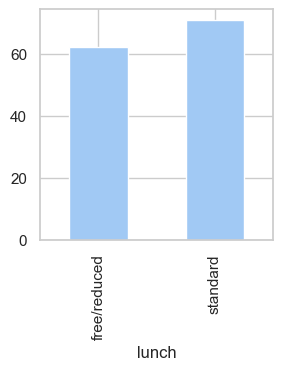

In [88]:
plt.figure(figsize=(3,3))
data.groupby(by="lunch")['average score'].mean().plot(kind='bar')
plt.show()

* Students availed for standard lunch has more average score compared to students enrolled for free lunch

<Figure size 300x300 with 0 Axes>

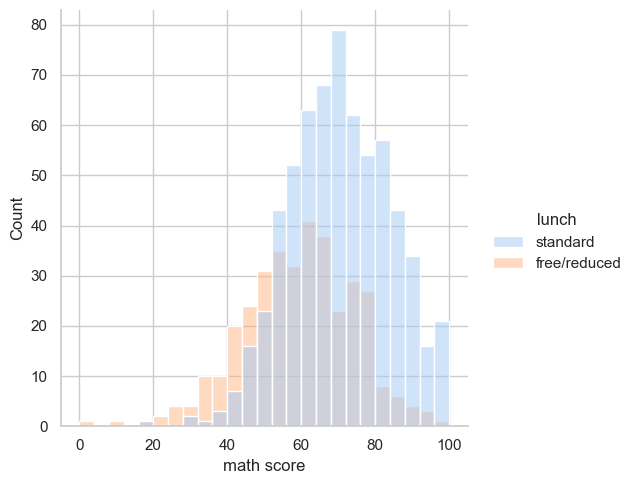

<Figure size 300x300 with 0 Axes>

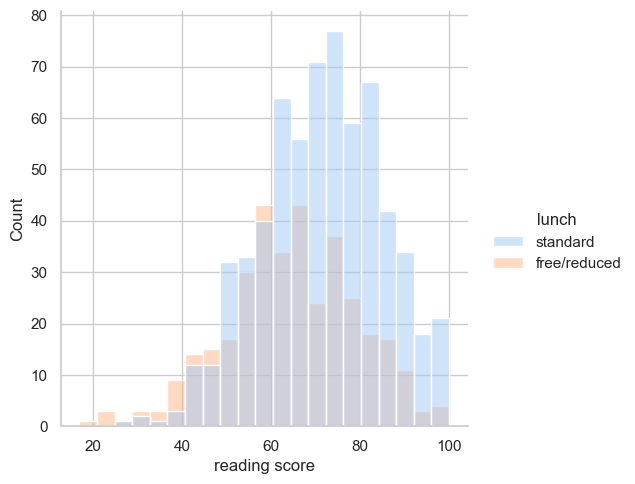

<Figure size 300x300 with 0 Axes>

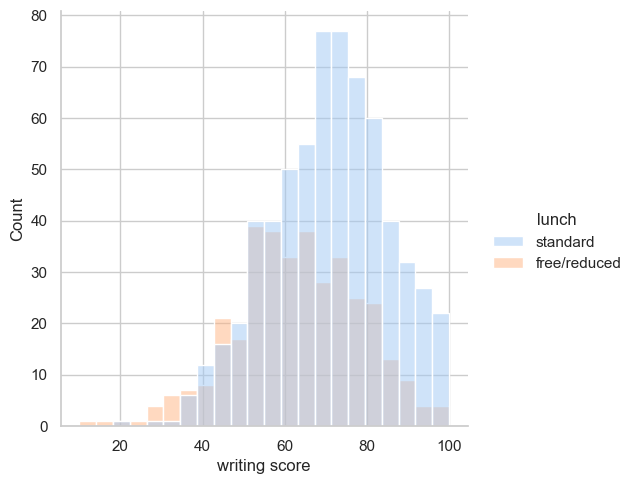

<Figure size 300x300 with 0 Axes>

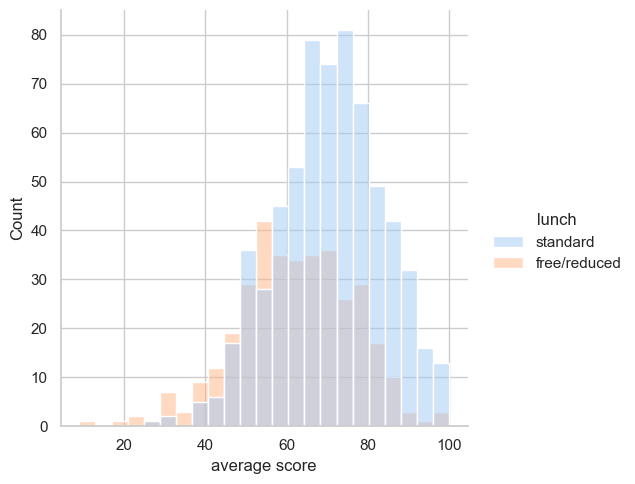

In [90]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    plt.figure(figsize=(3,3))
    sns.displot(data, x=col, hue='lunch')
    plt.show()

In [99]:
pd.pivot_table(data, columns='lunch', index='race/ethnicity', values='average score', aggfunc=np.count_nonzero)

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


* No strong signals between lunch and groups (I was assuming if there could be any connection that any specific groups opting for specific type of lunch)

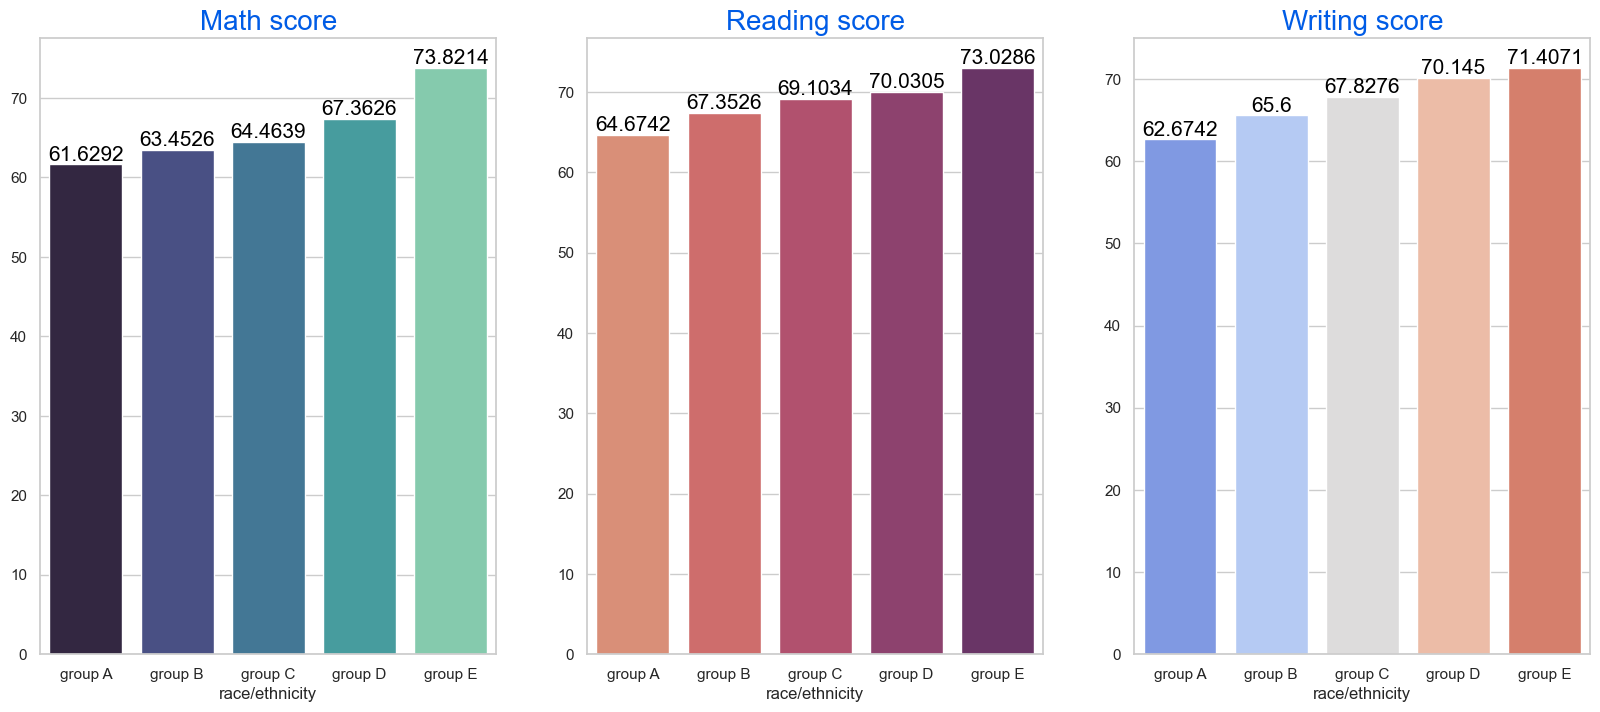

In [158]:
Group_data2=data.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

<b>  test preparation course </b>

In [107]:
data['test preparation course'].unique(), data['test preparation course'].nunique()

(array(['none', 'completed'], dtype=object), 2)

In [108]:
data.groupby(by="test preparation course")['average score'].mean()

test preparation course
completed    72.670391
none         65.024922
Name: average score, dtype: float64

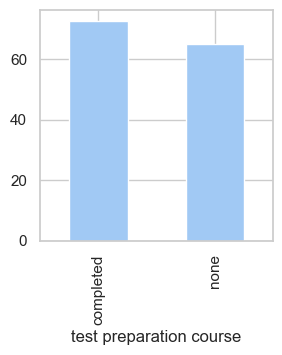

In [110]:
plt.figure(figsize=(3,3))
data.groupby(by="test preparation course")['average score'].mean().plot(kind='bar')
plt.show()

* CLearly students completed the test preparation course seems to have more avergae score on three areas compared to the students who did not clear/opt for test preparation course

<Figure size 300x300 with 0 Axes>

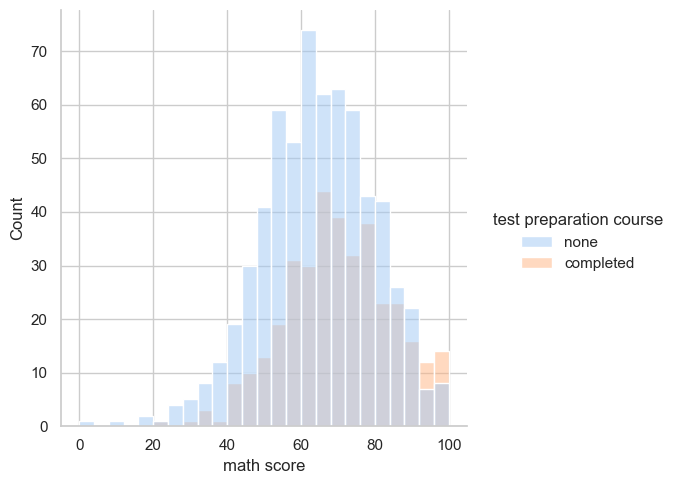

<Figure size 300x300 with 0 Axes>

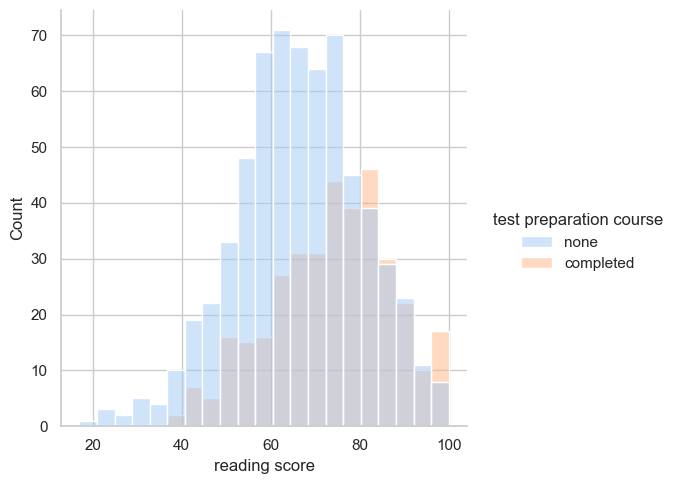

<Figure size 300x300 with 0 Axes>

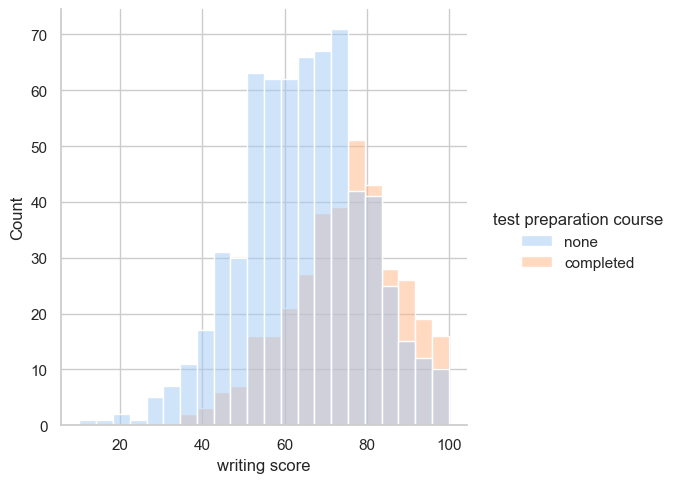

<Figure size 300x300 with 0 Axes>

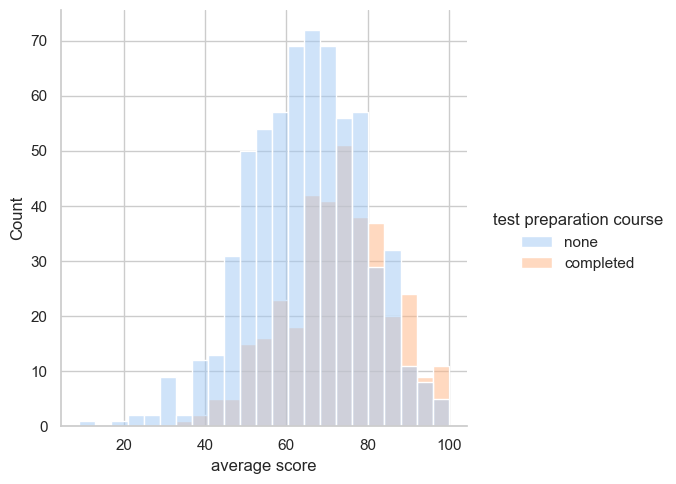

In [111]:
cols = ['math score', 'reading score', 'writing score', 'average score']

for col in cols:
    plt.figure(figsize=(3,3))
    sns.displot(data, x=col, hue='test preparation course')
    plt.show()

<Axes: xlabel='average score', ylabel='Count'>

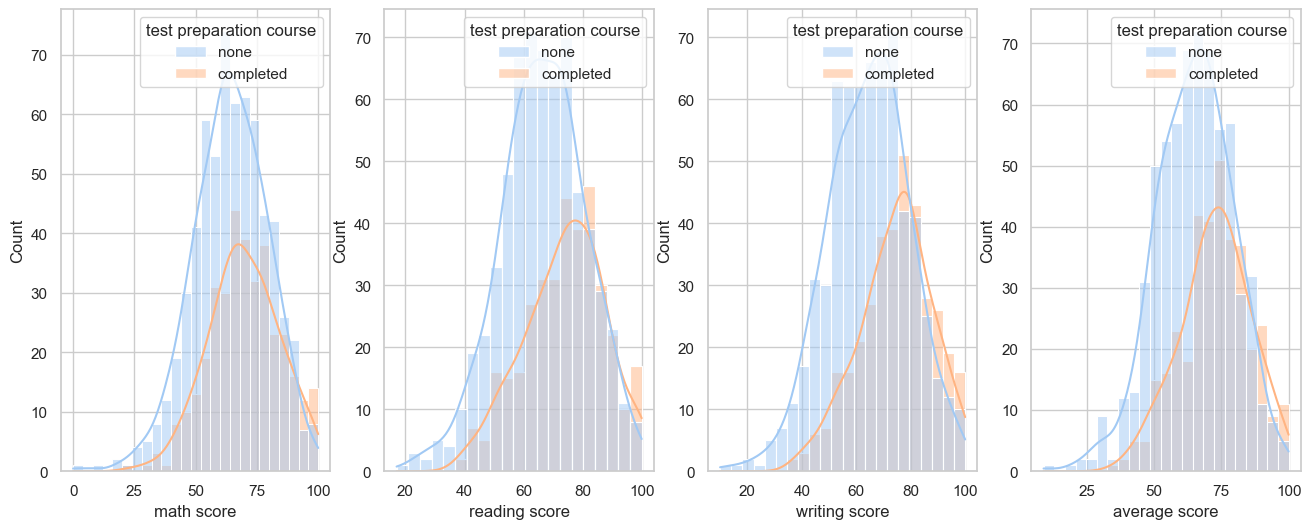

In [134]:
fig, axes = plt.subplots(1,4, figsize=(16,6))

plt.subplot(141)
sns.histplot(data=data, x='math score', hue='test preparation course', kde=True, color='g')

plt.subplot(142)
sns.histplot(data=data, x='reading score', hue='test preparation course', kde=True)

plt.subplot(143)
sns.histplot(data=data, x='writing score', hue='test preparation course', kde=True)

plt.subplot(144)
sns.histplot(data=data, x='average score', hue='test preparation course', kde=True)



In [124]:
math_full  = np.round((data[data['math score'] == 100].count().values[0]/data.shape[0]) * 100,3)
read_full  = np.round((data[data['reading score'] == 100].count().values[0]/data.shape[0]) * 100,3)
write_full = np.round((data[data['writing score'] == 100].count().values[0]/data.shape[0]) * 100,3)

print("Number of students got full marks in math:    {}".format(math_full))
print("Number of students got full marks in reading: {}".format(read_full))
print("Number of students got full marks in writing: {}".format(write_full))

Number of students got full marks in math:    0.7
Number of students got full marks in reading: 1.7
Number of students got full marks in writing: 1.4


In [125]:
math_full  = np.round((data[data['math score'] < 20].count().values[0]/data.shape[0]) * 100,3)
read_full  = np.round((data[data['reading score'] < 20].count().values[0]/data.shape[0]) * 100,3)
write_full = np.round((data[data['writing score'] < 20].count().values[0]/data.shape[0]) * 100,3)

print("Number of students got <20 in math:    {}".format(math_full))
print("Number of students got <20 in reading: {}".format(read_full))
print("Number of students got <20 in writing: {}".format(write_full))

Number of students got <20 in math:    0.4
Number of students got <20 in reading: 0.1
Number of students got <20 in writing: 0.3


* STudents have done really good in reading and then in writing
* Maths results not so positive compared to other two subjects - More students got less than 20 and less students got full makrs compared to other two subjects

<b> Outlier check </b>

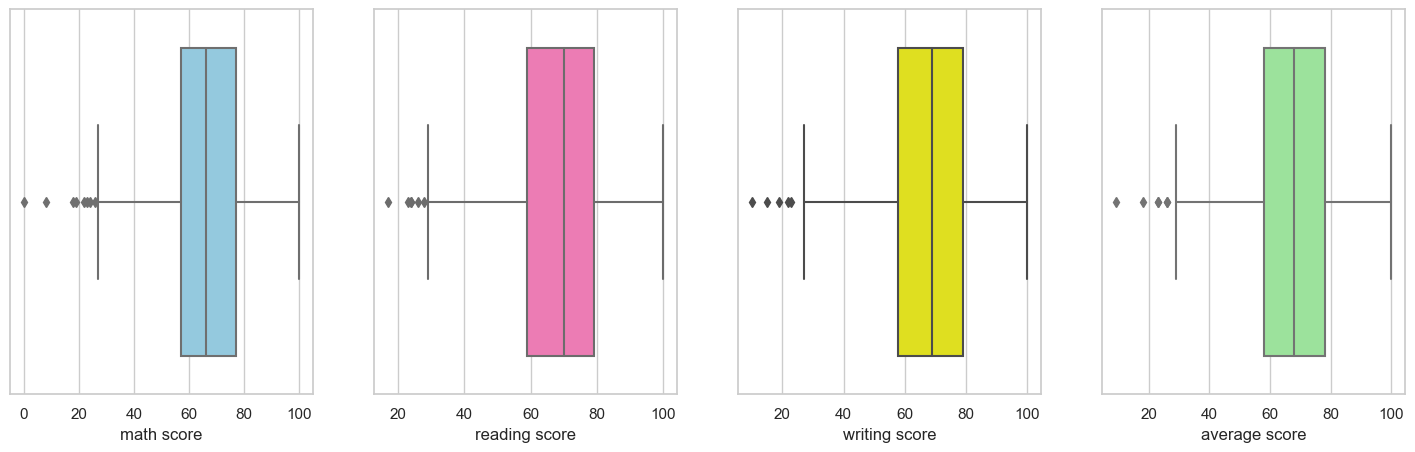

In [170]:
plt.subplots(1,4, figsize=(18,5))

plt.subplot(141)
sns.boxplot(data=data, x='math score', color='skyblue')

plt.subplot(142)
sns.boxplot(data=data, x='reading score', color='hotpink')

plt.subplot(143)
sns.boxplot(data=data, x='writing score', color='yellow')

plt.subplot(144)
sns.boxplot(data=data, x='average score', color='lightgreen')
plt.show()

Multi-variate check

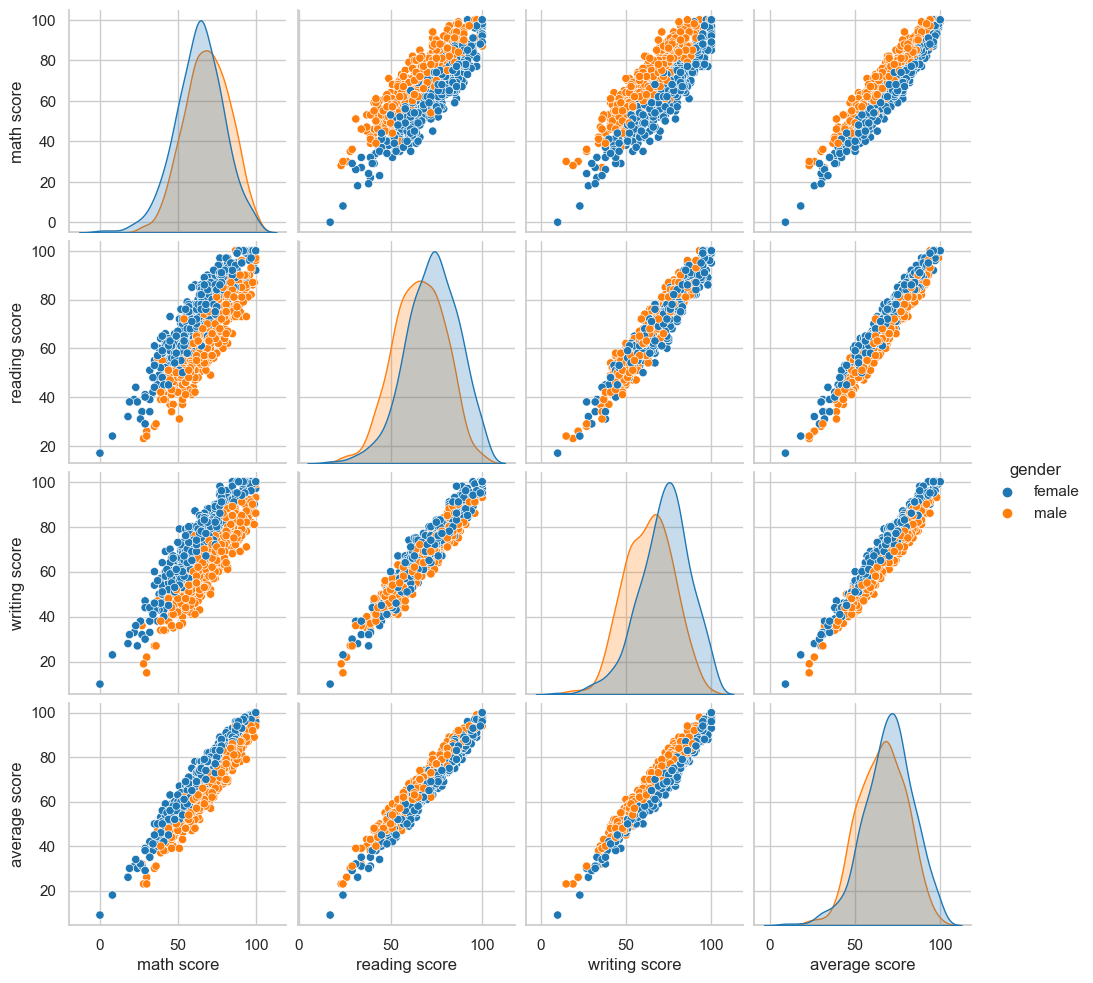

In [174]:
sns.pairplot(data, hue='gender', palette='tab10')

<b>  Conclusion </b>

1) No null values or duplicate observations
2) New feature called Average score dervied - to represent the three scores
3) Gender: Reading & writing - Female students tends to score more compared to male students
           Math              - Male students has scored more compared to female students
4) Race/Ethinicirty:    Group E students has more average of scores compared to other groups
5) Parental level of education: Students of parents with masters degree has shown better   	results. Students of parents with high school has less results comparitively
6) lunch: Students opted for standard lunch has shown more results compared to students opted for free lunch
7) test preparation course: Students completed the test preparation course has done relatively better than students who have not completed the test preparation course
8) Students have performed well in reading & writing compared to Math in general 